In [101]:
import pandas as pd
import datetime
from datetime import timedelta
import pandas_datareader.data as web
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

fed_path = '/Users/sheng/Documents/Jupyter Notebook/Tools for Analytics/Fall 2018/Fed events v3.csv'
trade_path = '/Users/sheng/Documents/Jupyter Notebook/Tools for Analytics/Fall 2018/Trade disputes events v3.csv'

fed_dataframe = pd.read_csv(fed_path)
trade_dataframe = pd.read_csv(trade_path)


In [109]:
fed_dataframe.head()

,Event,Year,Month,Day,Company Name,Ticker,Market,Industry,EventDate
0,Fed Rate Hike to 0.25 - 0.5%,2015,12,16,DowDuPont Inc.,DWDP,^DJI,Basic Materials (Chemicals),2015-12-16
1,Fed Rate Hike to 0.25 - 0.5%,2015,12,16,3M Co.,MMM,^DJI,Business/Consumer Services,2015-12-16
2,Fed Rate Hike to 0.25 - 0.5%,2015,12,16,International Business Machines Corp.,IBM,^DJI,Business/Consumer Services,2015-12-16
3,Fed Rate Hike to 0.25 - 0.5%,2015,12,16,Exxon Mobil Corp.,XOM,^DJI,Energy,2015-12-16
4,Fed Rate Hike to 0.25 - 0.5%,2015,12,16,Chevron Corp.,CVX,^DJI,Energy,2015-12-16


In [103]:
trade_dataframe.head()

,Event,Year,Month,Day,Company Name,Ticker,Market,Industry,Country
0,US implemented universal tariffs on solar pane...,2018,2,7,DowDuPont Inc.,DWDP,^DJI,Basic Materials (Chemicals),U.S.
1,US implemented universal tariffs on solar pane...,2018,2,7,3M Co.,MMM,^DJI,Business/Consumer Services,U.S.
2,US implemented universal tariffs on solar pane...,2018,2,7,International Business Machines Corp.,IBM,^DJI,Business/Consumer Services,U.S.
3,US implemented universal tariffs on solar pane...,2018,2,7,Exxon Mobil Corp.,XOM,^DJI,Energy,U.S.
4,US implemented universal tariffs on solar pane...,2018,2,7,Chevron Corp.,CVX,^DJI,Energy,U.S.


In [104]:
fed_event_name = fed_dataframe['Event']
fed_company_name = fed_dataframe['Company Name']
fed_company = fed_dataframe['Ticker'] # ticker name
fed_market = fed_dataframe['Market']
us_industry = fed_dataframe['Industry']
fed_year = fed_dataframe['Year']
fed_month = fed_dataframe['Month']
fed_day = fed_dataframe['Day']

trade_event_name = trade_dataframe['Event']
trade_company_name = trade_dataframe['Company Name']
trade_company = trade_dataframe['Ticker'] # ticker name
trade_market = trade_dataframe['Market']
trade_industry = trade_dataframe['Industry']
trade_year = trade_dataframe['Year']
trade_month = trade_dataframe['Month']
trade_day = trade_dataframe['Day']
trade_country = trade_dataframe['Country']

In [105]:
# Fed data processing

fed_dic = {}
for i in range(0, len(fed_market)):
    fed_dic[fed_company[i]] = fed_market[i]

# Add an "EventDate" column to the main dataframe
fed_eventdate = []
for i in range(0, len(fed_dataframe)):
    fed_eventdate.append(datetime.datetime(fed_year[i], fed_month[i], fed_day[i]))
fed_dataframe['EventDate'] = fed_eventdate

# fed_dataframe
fed_inter_days = []
fed_uniquedays = sorted(fed_dataframe['EventDate'].unique()) # 8 unique days
for i in range(0, len(fed_uniquedays)-1):
    fed_inter_days.append(int((fed_uniquedays[i+1] - fed_uniquedays[i])/np.timedelta64(1,'D')))
fed_sample_length = min(fed_inter_days) # 84, inter_days:  [364, 91, 91, 182, 98, 84, 105]
# fed_sample_length
fed_eventdate_set = fed_dataframe['EventDate'].unique()
# fed_eventdate_set

In [106]:
# Trade data processing

trade_dic = {}
for i in range(0, len(trade_market)):
    trade_dic[trade_company[i]] = trade_market[i]

# Add an "EventDate" column to the main dataframe
trade_eventdate = []
for i in range(0, len(trade_dataframe)):
    trade_eventdate.append(datetime.datetime(trade_year[i], trade_month[i], trade_day[i]))
trade_dataframe['EventDate'] = trade_eventdate

# trade_dataframe
trade_inter_days = []
trade_uniquedays = sorted(trade_dataframe['EventDate'].unique()) # 8 unique days
for i in range(0, len(trade_uniquedays)-1):
    trade_inter_days.append(int((trade_uniquedays[i+1] - trade_uniquedays[i])/np.timedelta64(1,'D')))
trade_sample_length = min(trade_inter_days) # 84, inter_days:  [364, 91, 91, 182, 98, 84, 105]
# fed_sample_length
trade_eventdate_set = trade_dataframe['EventDate'].unique()
# len(trade_eventdate_set)

In [107]:
# Creating inputs for data overview

num_fed_events = len(fed_eventdate_set) # 8
num_trade_events = len(trade_eventdate_set) # 24
event_cat_label = ['Fed Events', 'Trade Dispute Events']# num_trade_events

num_us_stock = len(us_industry)/num_fed_events #30
num_china_stock = len(trade_industry)/num_trade_events - num_us_stock #10
fed_event_list = list(fed_event_name[[0 + x*(len(fed_dataframe)-0)/len(fed_eventdate_set) for x in range(len(fed_eventdate_set))]])
trade_event_list = list(trade_event_name[[0 + x*(len(trade_dataframe)-0)/len(trade_eventdate_set) for x in range(len(trade_eventdate_set))]])
# trade_event_list

us_industry_list = list(us_industry)[0:int(num_us_stock)] #30 with duplicates
us_unique_industry_list = list(set(us_industry_list)) #12 distinct industries
us_unique_industry_count = list(np.unique(us_industry_list, return_counts=True)[1]) # 12 numbers
us_unique_industry_count_pct = [(x*100) / 30 for x in us_unique_industry_count]

china_industry_list = list(trade_industry)[int(num_us_stock):int(num_us_stock+num_china_stock)] #10
china_unique_industry_list = list(set(china_industry_list)) # 8
china_unique_industry_count = list(np.unique(china_industry_list, return_counts=True)[1]) # 8 numbers
china_unique_industry_count_pct = [(x*100) / 30 for x in china_unique_industry_count]

combined_industry_list = list(trade_industry)[0:int(num_us_stock+num_china_stock)] #40 with duplicates
combined_unique_industry_list = list(set(combined_industry_list)) #13 distinct industries
combined_unique_industry_count = list(np.unique(combined_industry_list, return_counts=True)[1])
combined_unique_industry_count_pct = [(x*100) / 30 for x in combined_unique_industry_count]

# us_stock_list = list(company)[0:int(num_us_stock)]
# us_company_list = list(dataframe['Company Name'])[0:int(num_us_stock)]

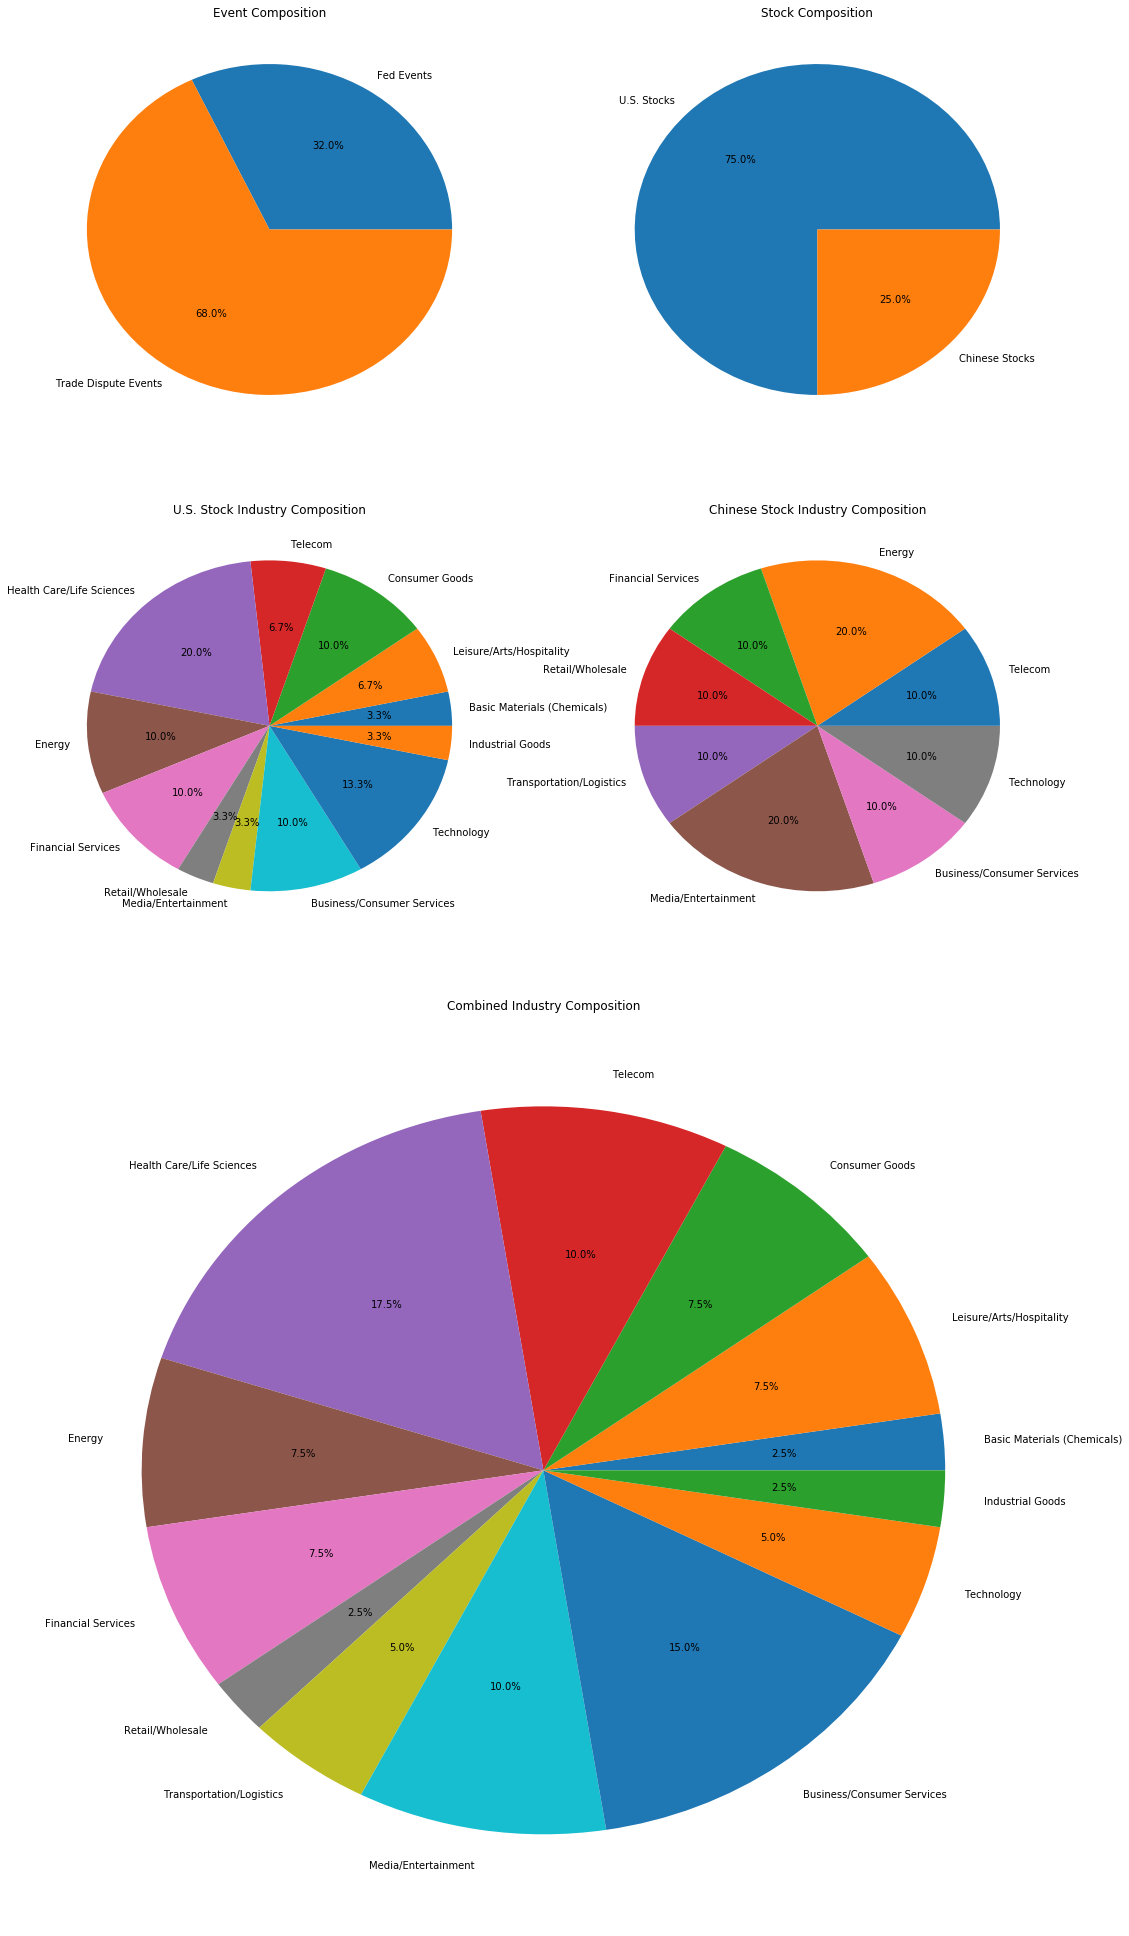

In [108]:
# 5 plots for event, stock, and industry compositions
import matplotlib.gridspec as gridspec

fig = plt.figure(1)
gridspec.GridSpec(4,2) # 4 rows, 2 columns

# small plot at (0,0)
plt.subplot2grid((4,2), (0,0))
plt.pie([num_fed_events, num_trade_events], labels = event_cat_label, autopct = '%1.1f%%')
plt.title('Event Composition')

# small plot at (0,1)
plt.subplot2grid((4,2), (0,1))
plt.pie([num_us_stock, num_china_stock], labels = ['U.S. Stocks', 'Chinese Stocks'], autopct = '%1.1f%%')
plt.title('Stock Composition')

# small plot at (1,0)
plt.subplot2grid((4,2), (1,0))
plt.pie(us_unique_industry_count_pct,labels = us_unique_industry_list, autopct = '%1.1f%%')
plt.title('U.S. Stock Industry Composition')

# small plot at (1,1)
plt.subplot2grid((4,2), (1,1))
plt.pie(china_unique_industry_count_pct, labels= china_unique_industry_list, autopct = '%1.1f%%')
plt.title('Chinese Stock Industry Composition')

# large plot at (2,0)
plt.subplot2grid((4,2), (2,0), colspan=2, rowspan=2)
plt.pie(combined_unique_industry_count_pct, labels= combined_unique_industry_list, autopct = '%1.1f%%')
plt.title('Combined Industry Composition')

fig.set_size_inches(w=18,h=35)

plt.show()

In [124]:
# dataframe = pd.DataFrame(pd.read_csv('/Users/sheng/Documents/Jupyter Notebook/Tools for Analytics/Fall 2018/Fed events v3.csv'))
# event_name = dataframe['Event']
# company = dataframe['Ticker']
# company_name = dataframe['Company Name']
# market = dataframe['Market'] #240
# industry = dataframe['Industry']
# year = dataframe['Year']
# month = dataframe['Month']
# day = dataframe['Day']

# # match stock with market (either DJI or NASDAQ)
# dic = {}
# for i in range(0, len(market)):
#     dic[company[i]] = market[i]

# #Add an "EventDate" column to the main dataframe
# eventdate = []
# for i in range(0, len(dataframe)):
#     eventdate.append(datetime.datetime(year[i], month[i], day[i]))
# dataframe['EventDate'] = eventdate

# inter_days = []
# uniquedays = sorted(dataframe['EventDate'].unique()) # 8 unique days
# for i in range(0, len(uniquedays)-1):
#     inter_days.append(int((uniquedays[i+1] - uniquedays[i])/np.timedelta64(1,'D')))
# sample_length = min(inter_days) # 84, inter_days:  [364, 91, 91, 182, 98, 84, 105]


#### Regression #####

fed_reg_result= []

fed_subdate_cumulative_abnormal_return = pd.DataFrame()
fed_cumu_ab_ret_per_event = []
for date in fed_eventdate_set:
    fed_subevent_df = fed_dataframe[fed_dataframe.EventDate == date]
    start_date = date - np.timedelta64(fed_sample_length, 'D')
    end_date = date + np.timedelta64(fed_sample_length, 'D')

    fed_subevent_company_list = fed_subevent_df['Ticker'].unique()
    fed_subevent_cumulative_abnormal_return = pd.DataFrame() # again?

    for company in fed_subevent_company_list:
        price = web.DataReader([company, fed_dic[company]],'yahoo', start_date,end_date)
        close_price = price['Close']
        return_rate = close_price.pct_change()
        x =return_rate[company]
        X= sm.add_constant(x)
        y = return_rate[dic[company]]
        model = sm.OLS(y,X,missing='drop')
        result = model.fit()
        (a,b) = result.params
        return_rate['Abnormal_Return'] = y - x * b - a
        fed_subevent_cumulative_abnormal_return[f'{company}'] = return_rate['Abnormal_Return'].cumsum()[1:]
#         subevent_cumulative_abnormal_return
    
    fed_subevent_cumulative_abnormal_return['Average_CAR'] = fed_subevent_cumulative_abnormal_return.apply(lambda x: x.sum()/(len(fed_subevent_company_list)),axis = 1)
    fed_reg_result.append(fed_subevent_cumulative_abnormal_return['Average_CAR'])
    fed_cumu_ab_ret_per_event.append(fed_subevent_cumulative_abnormal_return['Average_CAR'][-1])

# ### inputs for plotting
# num_fed_events = len(eventdate_set) #8
# num_us_stock = len(industry)/num_fed_events #30
# fed_event_list = list(event_name[[0 + x*(len(dataframe)-0)/len(eventdate_set) for x in range(len(eventdate_set))]])
# us_industry_list = list(industry)[0:int(num_us_stock)]
# us_unique_industry_list = list(set(us_industry_list))
# us_unique_industry_count = list(np.unique(us_industry_list, return_counts=True)[1])
# us_stock_list = list(company)[0:int(num_us_stock)]
# us_company_list = list(dataframe['Company Name'])[0:int(num_us_stock)]



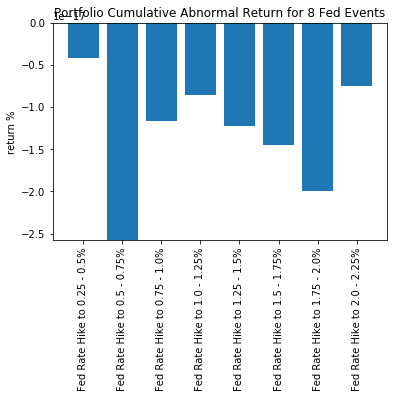

In [144]:
# Plot Portfolio Cumulative Abnormal Return for 8 Fed Events
plt.bar(list(range(8)),fed_cumu_ab_ret_per_event, align='center')
plt.xticks(list(range(8)), fed_event_list)
plt.xticks(rotation=90)
plt.title("Portfolio Cumulative Abnormal Return for 8 Fed Events")
plt.ylabel('return %');
plt.show()

In [153]:
type(fed_reg_result)

list

In [151]:
# COL_NUM = 2
# ROW_NUM = len(fed_reg_result)//2
# import matplotlib.pyplot as plt
# fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(200,200))

# for i in range(len(fed_reg_result)):
#     ax = axes[int(i/COL_NUM), i%COL_NUM]
#     fed_reg_result[i].plot(kind='bar', ax=ax)

# # FYI - 
# plt.tight_layout()
# ROW_NUM

4

In [156]:
trade_reg_result= []
trade_reg_result_us = []
trade_reg_result_china = []
us_return = 0
china_return = 0

trade_subdate_cumulative_abnormal_return = pd.DataFrame()
trade_cumu_ab_ret_per_event = []
for date in trade_eventdate_set:
    trade_subevent_df = trade_dataframe[trade_dataframe.EventDate == date]
    start_date = date - np.timedelta64(trade_sample_length, 'D')
    end_date = date + np.timedelta64(trade_sample_length, 'D')

    trade_subevent_company_list = trade_subevent_df['Ticker'].unique()
    trade_subevent_cumulative_abnormal_return = pd.DataFrame() # again?
    
    
    trade_subevent_us_company_list = list(trade_subevent_df[trade_subevent_df['Country'] == 'U.S.']['Ticker'].unique())
    trade_subevent_china_company_list = list(trade_subevent_df[trade_subevent_df['Country'] == 'China']['Ticker'].unique())
    

    for company in trade_subevent_company_list:
        price = web.DataReader([company, trade_dic[company]],'yahoo', start_date,end_date)
        close_price = price['Close']
        return_rate = close_price.pct_change()
        x =return_rate[company]
        X= sm.add_constant(x)
        y = return_rate[trade_dic[company]]
        model = sm.OLS(y,X,missing='drop')
        result = model.fit()
        (a,b) = result.params
        return_rate['Abnormal_Return'] = y - x * b - a
        trade_subevent_cumulative_abnormal_return[f'{company}'] = return_rate['Abnormal_Return'].cumsum()[1:]
#         subevent_cumulative_abnormal_return
    
    trade_subevent_cumulative_abnormal_return['Average_CAR'] = trade_subevent_cumulative_abnormal_return.apply(lambda x: x.sum()/(len(trade_subevent_company_list)),axis = 1)
    
    trade_subevent_cumulative_abnormal_return_us_company = trade_subevent_cumulative_abnormal_return[trade_subevent_us_company_list]
    trade_subevent_cumulative_abnormal_return_us_company['Average_CAR'] = trade_subevent_cumulative_abnormal_return_us_company.apply(lambda x: x.sum()/(len(trade_subevent_us_company_list)),axis = 1)
                
    trade_subevent_cumulative_abnormal_return_china_company = trade_subevent_cumulative_abnormal_return[trade_subevent_china_company_list]
    trade_subevent_cumulative_abnormal_return_china_company['Average_CAR'] = trade_subevent_cumulative_abnormal_return_china_company.apply(lambda x: x.sum()/(len(trade_subevent_china_company_list)),axis = 1)
    
    trade_reg_result.append(trade_subevent_cumulative_abnormal_return['Average_CAR'])
    
    trade_reg_result_us.append(trade_subevent_cumulative_abnormal_return_us_company['Average_CAR'])
    trade_reg_result_china.append(trade_subevent_cumulative_abnormal_return_china_company['Average_CAR'])
    trade_cumu_ab_ret_per_event.append(trade_subevent_cumulative_abnormal_return['Average_CAR'][-1])

us_return = sum([i[-1] for i in trade_reg_result_us])
china_return = sum([i[-1] for i in trade_reg_result_china])

C:\Users\sheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


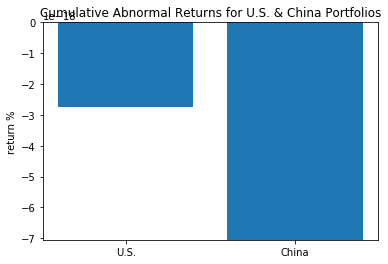

In [162]:
plt.bar(list(range(2)),[us_return, china_return], align='center')
plt.xticks(list(range(2)), ['U.S.','China'])
# plt.xticks(rotation=90)
plt.title("Cumulative Abnormal Returns for U.S. & China Portfolios")
plt.ylabel('return %')
plt.show()

In [161]:
list(range(2))

[0, 1]

In [118]:
us_unique_industry_count_pct = [(x*100) / 30 for x in us_unique_industry_count]
sum(us_unique_industry_count_pct)
# myList = [10,20,30,40,50,60,70,80,90]
# myInt = 10
# newList = [x / myInt for x in myList]

99.999999999999986

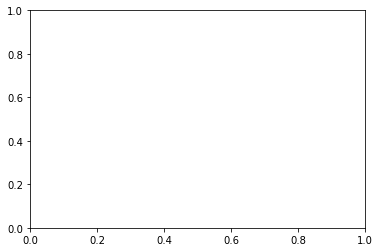

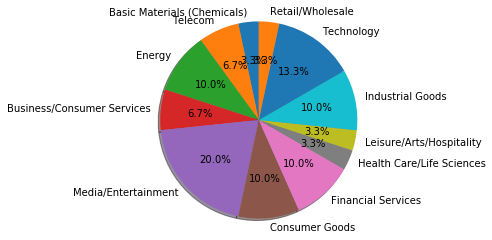

In [119]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(us_unique_industry_count_pct, labels=us_unique_industry_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()